# COGS 118B - Final Project

# Airline Sentiment Analysis

## Group members

- Sukhman Virk
- Athira Rajiv
- Neil Bajaj
- Yash Sharma
- Lucas Fasting

# Abstract 
In this study, we address the declining customer satisfaction in the US airline industry, which has been exacerbated by efforts to cut costs. Despite reduced prices, public sentiment reflects a deterioration in service quality, as captured in customer feedback on social media. Utilizing a dataset of approximately 14,600 tweets, we employ natural language processing (NLP) techniques, specifically Term Frequency-Inverse Document Frequency (TF-IDF), to quantitatively analyze customer sentiment. Our approach involves using an unsupervised machine learning algorithm, K-means, to categorize feedback into distinct clusters. We form clusters using negative feedback from individual airlines, allowing us to identify and categorize the main areas needing improvement. To evaluate the relevance of the feedback to actual service issues, we implemented topic modeling to uncover a the main issue of the feedback in each cluster. The effectiveness of our clustering was measured using the silhouette score. We also had a negative sentiment reason column in our table that helped us verify whether our clusters accurately clustered according to the feedback that was manually extracted from the text. Although our analysis yielded clusters with moderate silhouette scores, indicating a blend of sentiments, a comparative analysis of the clusters and manually labeled issues revealed a rough correlation. This suggests that as more data is incorporated over time, the clarity and distinction of these clusters are likely to improve, potentially leading to more targeted and effective strategies for airlines to enhance their service quality. 


# Background

Social media platforms, particularly Twitter, have become a popular source for customer feedback in recent years. Analyzing customer sentiment can be a powerful tool for measuring customer satisfaction and identifying areas of improvement in industries such as the airline industry. Because Twitter is a real-time platform and is used by millions of people, it has become a valuable source for analyzing customer sentiment. NLP techniques can be used to preprocess and analyze Twitter text data to gather valuable information about customers' opinions about different products and services<a name="note1"></a>[<sup>[1]</sup>](#note1).

Previous studies in this field have concentrated on a number of important factors. A significant amount of research has been done on the preprocessing and analysis of Twitter text data using natural language processing (NLP) techniques like TF-IDF, word input, and emotional vocabulary<a name="note2"></a>[<sup>[2]</sup>](#note2) numerical format that is appropriate for machine learning algorithms.

Moreover, existing studies have focused on classifying tweets into various sentiments and have found themes or patterns within those sentiments through the use of clustering algorithms. For this, K-Means clustering, hierarchical clustering, and Gaussian mixture model (GMM) clustering are frequently employed. A particular study focused on a multitude of clustering approaches with regard to sentiment analysis, finding that the use of clustering algorithms quickly and effectively separated tweets based on their sentiment scores<a name="note3"></a>[<sup>[3]</sup>](#note3).

As proven in other studies, sentiment analysis in tweets can help us decipher people’s opinions, sentiments, attitudes, and emotions from merely written text. In a study conducted by Barreto, Moura, Carvalho, Paes and Plastino, they tend to address the sentiment classification of tweets, a task made challenging by the informal style of language, use of slang, and the presence of misspellings and grammatical inconsistencies<a name="note4"></a>[<sup>[4]</sup>](#note4). By evaluating these words with not only traditional vector space models like Term Frequency-Inverse Document Frequency (TF-IDF), but also with advanced methods like Word2Vec, FastText, and GloVe, this study offers a more comprehensive understanding of the effectiveness of different word representation models in the context of Twitter sentiment analysis.


# Problem Statement

We want to enhance customer satisfaction among users of US airlines. The approach involves utilizing clustering algorithms to organize customer feedback data obtained from Twitter, addressing various airlines operating in America. The primary objective is to create clusters representing different sentiments, enabling the identification of airlines with the highest customer satisfaction and pinpointing specific areas each airline needs to focus on to enhance overall customer satisfaction.
To address this problem, natural language processing (NLP) techniques like TF-IDF will be applied to convert textual input into a numerical format suitable for machine learning algorithms. The numeric representations derived from NLP techniques will then be utilized in the K-means clustering algorithm. This process ensures the problem's quantifiability by translating qualitative feedback into quantitative data for analysis.
The effectiveness of the clustering process will be measured using metrics, namely the silhouette score, which assesses the cohesion and separation of clusters. Additionally, the performance of clustering algorithms will be evaluated visually using Principal Component Analysis (PCA). This allows for the observation of how well customer feedback is grouped into distinct sentiments and themes within those sentiments, providing a measurable assessment of the clustering process.
The problem is replicable as it involves analyzing customer feedback, a continuously growing dataset. By applying sentiment analysis techniques to newer data, changes in customer sentiment and satisfaction can be monitored over time. The clustering model can be updated with the inclusion of new data, ensuring its adaptability to shifting customer expectations. This replicable nature enables airlines to stay abreast of evolving customer sentiments, facilitating timely adjustments to their services to meet customer needs effectively.


# Data

https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data


The dataset utilized for this analysis contains Twitter data concerning customer feedback on US airlines. With several variables including 'tweet_created', 'text', and 'airline_sentiment', the dataset encompasses a total of 14,600 observations across 15 variables, each representing a tweet detailing a user's experience with a specific airline. Critical variables such as 'tweet_created', indicating the timestamp of tweet creation, 'text', containing the tweet content, and 'airline_sentiment', denoting the sentiment expressed in the tweet (positive, negative, or neutral), are integral to the analysis.
To prepare the data for analysis, several cleaning steps were undertaken. Initially, the 'tweet_created' variable was converted to datetime format using the pd.to_datetime() function, with separate columns created to extract date and time components. Following this, irrelevant columns such as 'tweet_location', 'retweet_count', and others deemed unnecessary were removed from the dataset. Additionally, observations with missing values in the 'text' column were dropped to ensure the integrity of the text data.
Text cleaning procedures were then implemented using a custom function named clean_text(). This function removed Twitter handles (@username), replaced non-alphanumeric characters with spaces, converted text to lowercase, and removed single characters and multiple whitespaces for consistency. Furthermore, stopwords, common words like 'the', 'and', 'is', etc., were removed from the cleaned text using NLTK's set of English stopwords.
The cleaned text data was finally stored in a new column labeled 'cleaned text' for further analysis. These data cleaning processes ensure the integrity and reliability of the dataset, laying a solid foundation for subsequent analysis and insights extraction.




In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/athirarajiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/athirarajiv/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'], format='%Y-%m-%d %H:%M:%S %z')
df['date'] = df['tweet_created'].dt.strftime('%m, %d, %Y')
df['time'] = df['tweet_created'].dt.strftime('%H:%M')

In [6]:
df = df.drop(columns=['tweet_location','retweet_count','name','airline_sentiment_gold','negativereason_gold','tweet_created','tweet_coord','negativereason_confidence'])

In [7]:
df = df.dropna(subset=['text'])

In [8]:
df.groupby(by=['airline']).count()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,text,user_timezone,date,time
airline,,,,,,,,
American,2759,2759,2759,1960,2759,1791,2759,2759
Delta,2222,2222,2222,955,2222,1613,2222,2222
Southwest,2420,2420,2420,1186,2420,1659,2420,2420
US Airways,2913,2913,2913,2263,2913,1851,2913,2913
United,3822,3822,3822,2633,3822,2527,3822,3822
Virgin America,504,504,504,181,504,379,504,504


In [9]:
def clean_text(text):
    text = re.sub(r'@\w+', '', str(text))
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-z]\s+', ' ',text)
    text = re.sub(r'^[a-z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [10]:
df['cleaned text'] = df['text'].apply(clean_text)

In [11]:
stop_words = set(stopwords.words('english'))
df['cleaned text'] = df['cleaned text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [12]:
def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [13]:
def convert_sentiment_to_numeric(sentiment):
    sentiment_map = {"positive": 1, "negative": -1, "neutral": 0}
    return sentiment_map.get(sentiment.lower(), None)

In [14]:
df['our_airline_sentiment_val'] = df['cleaned text'].apply(get_sentiment)
def convert_val(val):
    if val < 0:
        return 'negative'
    elif val > 0:
        return 'positive'
    else :
        return 'neutral'
df['our_airline_sentiment'] = df['our_airline_sentiment_val'].apply(convert_val)

In [15]:
df["airline_sentiment_numeric"] = df["airline_sentiment"].apply(convert_sentiment_to_numeric)

In [16]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said,0.0000,neutral,0
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky,0.0000,neutral,1
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip,0.0000,neutral,0
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative,-1
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative,-1


# Proposed Solution

To enhance customer satisfaction for US Airlines users by analyzing Twitter feedback, our proposed solution utilizes Natural Language Processing and Machine Learning techniques to cluster customer feedback into distinct sentiment groups. Initially, the data undergoes some basic text cleanup, where unnecessary text is removed from non-alphanumeric characters and any columns we will not be using will be dropped. Shortly after this, the TF-IDF method is applied to convert tweets into a numeric vector form, that we can use in our clustering algorithms. For clustering, we use algorithms such as K-Means or Gaussian Mixture Models. Our appropriate choice will depend on the accruacy of our clustering along with comparing it to the manually labelled data to see whether we have any correlation. Upon gathering our cluster results we will apply topic modeling to observe if there is any relation to the most common topics in the cluster and the actual reasons provided through the dataset.The goal is to enable the model to accurately identify the sentiment of new data and cluster it accordingly.

Once we have finished clustering the data a silhouette score will evaluate the quality of our cluster. This ensures adaptability to new data and can be tested for future data sets. It also is an easy metric for people viewing the data to understand. We will also leverage the capabilities of Topic modelling in our clusters and try to see if our clusters accurately model the reason behind the negative tweets in the cluster. This approach aims to provide actionable insights into customer sentiments, helping airlines on areas needing improvement. Through this entire process airlines will be able to identify areas of improvement provided with accurate data in an easy to understand format that can be scaled to ever increasing customer reviews.
Topic modeling the clusters will also let us see if similar negative feedback tweets fall into the same cluster, this will help us find out if our model is scalable and when more data is input into it, it will feed the negative feedback into the corresponding clusters.

# Evaluation Metrics

Since we will be using clustering as our main algorithm to find solutions for our proposed question, the Silhouette score will be the main evaluation metric for our project. The Silhouette coefficient is a metric that measures how well each data point fits into its cluster. It provides information about both the cohesion and the separation of the data point. The value of the silhouette coefﬁcient is between -1 and 1. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and is far away from the other clusters where it does not belong. This evaluation metric will help us determine how good our clustering is and if we are ready to move forward with the next steps of our project [topic modeling] to find out the main theme, positive points, and negative points for each cluster and data point. 
However, the silhoutte score isn't the only measure we're using. Since we have a column in our dataset which corresponds to the reason of negative feedback for the airline that is manually inputted, we can use that as a measure as to how accurate our clusters are. Even if our clusters have a low sillhoutte score and are not very distinct from each other, we can check whether our clusters, via topic modelling, correlate to the manual labells provided to us. If they do, we can claim that as the dataset increases in size, we wouldn't need to manually label the data, and the data would fall into the cluster with feedback of similar reasons.

# Results:




# Initial Setup and Model Training

In [17]:
y = df['airline_sentiment_numeric']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned text'], df['airline_sentiment_numeric'], test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)

/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [19]:
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.7844945355191257


In [20]:
df['predicted_sentiment_linReg'] = model.predict(df['cleaned text'])

In [21]:
model = make_pipeline(TfidfVectorizer(), SVC())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [22]:
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.7855191256830601


In [23]:
df['predicted_sentiment_SVC'] = model.predict(df['cleaned text'])

In [24]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC
0,570306133677760513,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),"02, 24, 2015",11:35,said,0.0000,neutral,0,-1,-1
1,570301130888122368,positive,0.3486,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),"02, 24, 2015",11:15,plus added commercials experience tacky,0.0000,neutral,1,-1,1
2,570301083672813571,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada),"02, 24, 2015",11:15,today must mean need take another trip,0.0000,neutral,0,0,0
3,570301031407624196,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada),"02, 24, 2015",11:15,really aggressive blast obnoxious entertainmen...,-0.3306,negative,-1,-1,-1
4,570300817074462722,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada),"02, 24, 2015",11:14,really big bad thing,-0.5829,negative,-1,-1,-1


In [25]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

# United Airlines

In [26]:
df_united = df[df['airline'] == 'United']
df_united_neg = df_united[df_united['airline_sentiment'] == 'negative']

In [27]:
# Initialize a TF-IDF vectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Apply TF-IDF vectorization to the cleaned text data of negative tweets from United Airlines
tfidf_matrix_united_neg = tfidf_vectorizer.fit_transform(df_united_neg['cleaned text'])

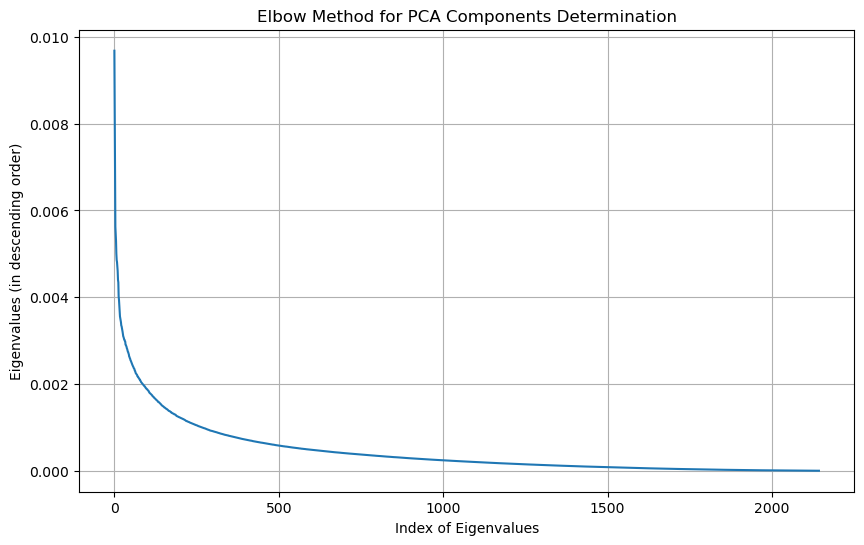

In [28]:
# Determine the optimal number of components for PCA using the elbow method
n_components = min(tfidf_matrix_united_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())  # Convert sparse matrix to dense

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination')
plt.grid(True)
plt.show()

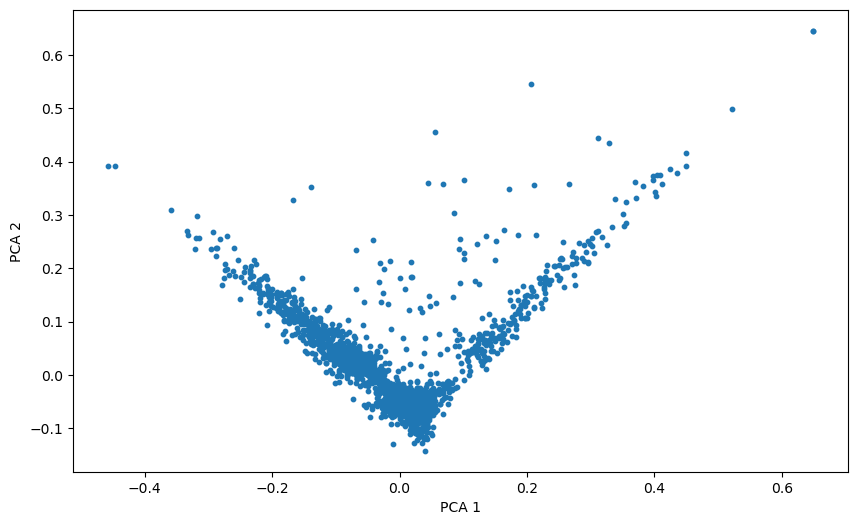

In [29]:
n_components = 300 #number of components using elbow method
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_united_neg.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [30]:
unique_negative_reasons = df_united_neg['negativereason'].nunique()
unique_negative_reasons

# Apply K-means clustering using the determined number of clusters based on unique negative reasons
kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_united_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")


/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Score: 0.026144376175456324


/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/1349466281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_neg['cluster'] = cluster_labels


In [31]:
# Perform topic modeling (Latent Dirichlet Allocation) for each cluster to extract main topics
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_united_neg[df_united_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_united_neg[df_united_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: cancelled flightled flight flighted flights flighting delayed got united hours
Actual negative reasons in this cluster:
negativereason
Cancelled Flight               105
Late Flight                     11
Customer Service Issue          10
Flight Booking Problems          8
Lost Luggage                     2
longlines                        2
Can't Tell                       2
Bad Flight                       1
Flight Attendant Complaints      1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: plane waiting flight sitting hours board gate hour left new
Actual negative reasons in this cluster:
negativereason
Late Flight                    58
Bad Flight                     31
Flight Attendant Complaints    12
Can't Tell                     11
Cancelled Flight                9
Customer Service Issue          7
Lost Luggage                    7
longlines    

# American Airlines

In [32]:
df_am = df[df['airline'] == 'American']
df_am_neg = df_am[df_am['airline_sentiment'] == 'negative']

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_am_neg = tfidf_vectorizer.fit_transform(df_am_neg['cleaned text'])

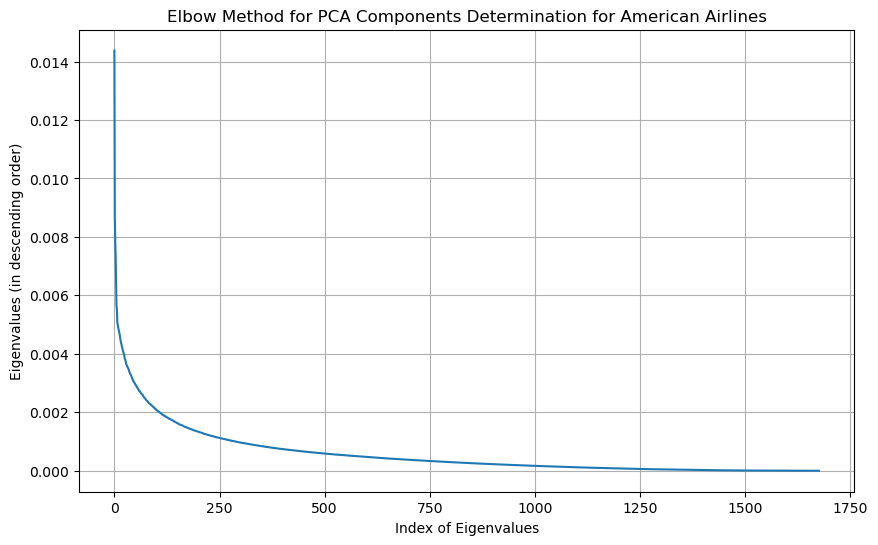

In [34]:
n_components = min(tfidf_matrix_am_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_am_neg.toarray()) 

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

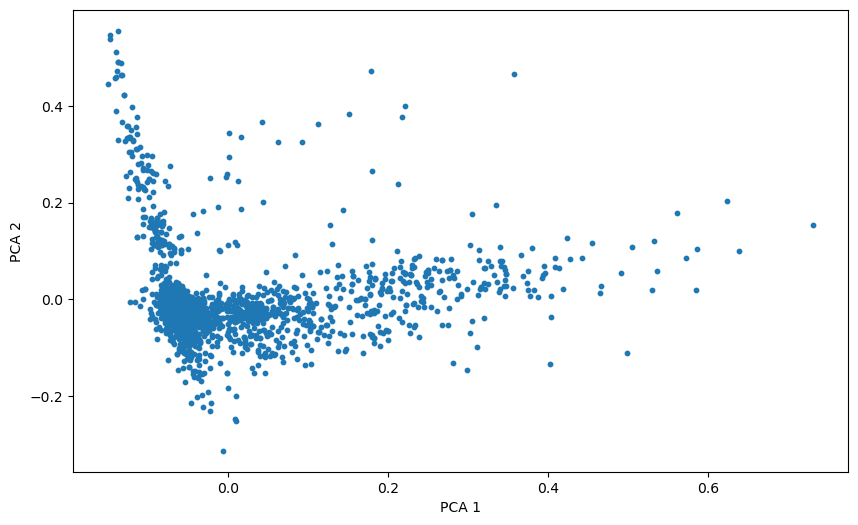

In [35]:
n_components = 125 #number of components using elbow method
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_am_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [36]:
unique_negative_reasons = df_am_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_am_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/1871764161.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am_neg['cluster'] = cluster_labels


Average Silhouette Score: 0.047415927475942705


In [37]:
df_am_neg.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,user_timezone,date,time,cleaned text,our_airline_sentiment_val,our_airline_sentiment,airline_sentiment_numeric,predicted_sentiment_linReg,predicted_sentiment_SVC,cluster
11879,570308309682675712,negative,1.0000,Customer Service Issue,American,@AmericanAir why would I even consider continu...,Quito,"02, 24, 2015",11:44,would even consider continuing point program r...,-0.5423,negative,-1,-1,-1,4
11881,570307949614256128,negative,0.6316,Bad Flight,American,@AmericanAir thanks for getting back to me. Bu...,Central Time (US & Canada),"02, 24, 2015",11:43,thanks getting back find airlines future,0.4404,positive,-1,1,-1,1
11882,570307948171423745,negative,0.6846,Flight Booking Problems,American,@AmericanAir why would I pay $200 to reactivat...,Quito,"02, 24, 2015",11:43,would pay 200 reactivate points useful certain...,0.6705,positive,-1,-1,-1,1
11883,570307434113310720,negative,0.6547,Late Flight,American,"@AmericanAir stranded for 24 hours in MIA, Pat...",Atlantic Time (Canada),"02, 24, 2015",11:41,stranded 24 hours mia patrick casimir aa staff...,0.2023,positive,-1,-1,-1,1
11884,570307390752608257,negative,1.0000,Flight Booking Problems,American,"@AmericanAir no thanks. As I said, being deni...",NaN,"02, 24, 2015",11:40,thanks said denied miles expired one week ago ...,-0.5106,negative,-1,-1,-1,1


In [38]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_am_neg[df_am_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_am_neg[df_am_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: hold hours wait flight waiting agent 24 hung hour late
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         88
Late Flight                    12
Cancelled Flight                7
Flight Booking Problems         4
longlines                       2
Can't Tell                      1
Lost Luggage                    1
Flight Attendant Complaints     1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: flight bag time aa help thanks gate http waiting amp
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         393
Can't Tell                     166
Late Flight                    161
Lost Luggage                    95
Flight Booking Problems         84
Flight Attendant Complaints     71
Bad Flight                      61
Cancelled Flight                40
longlines                       23
Damaged Lu

# Delta

In [39]:
df_delta = df[df['airline'] == 'Delta']
df_delta_neg = df_delta[df_delta['airline_sentiment'] == 'negative']

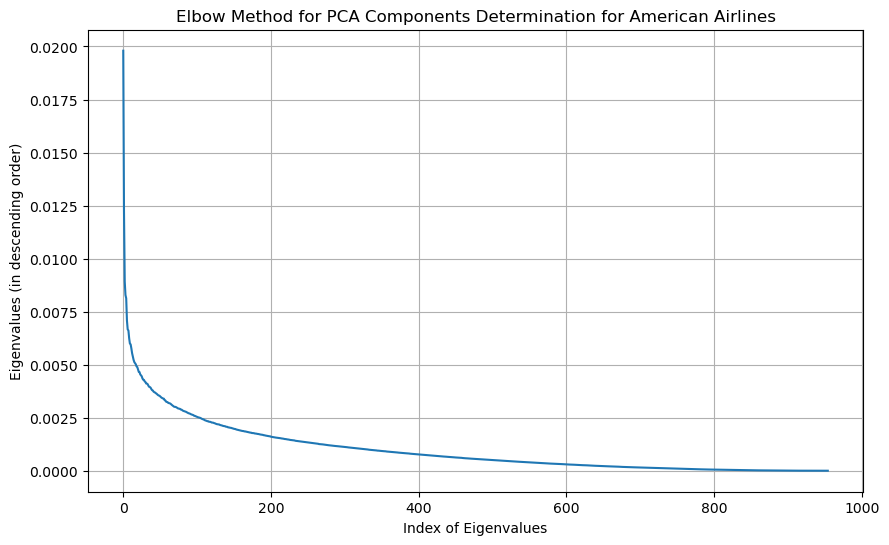

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_delta_neg = tfidf_vectorizer.fit_transform(df_delta_neg['cleaned text'])

n_components = min(tfidf_matrix_delta_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_delta_neg.toarray()) 

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

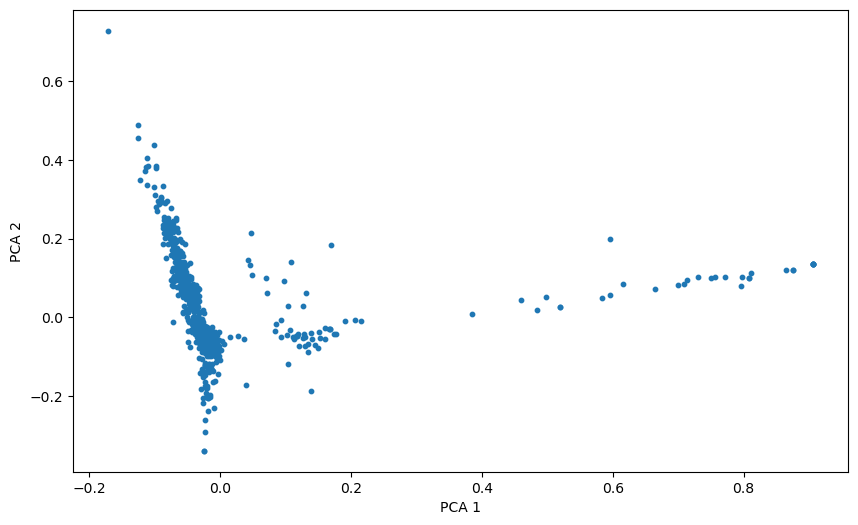

In [41]:
n_components = 90 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_delta_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [42]:
unique_negative_reasons = df_delta_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=42)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_delta_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

Average Silhouette Score: 0.06556883794653562


/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/3975085837.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_neg['cluster'] = cluster_labels


In [43]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_delta_neg[df_delta_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_delta_neg[df_delta_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: blue jet jetblue fraud work apology flighted money flight seen
Actual negative reasons in this cluster:
negativereason
Can't Tell                 7
Customer Service Issue     4
Cancelled Flight           3
Flight Booking Problems    2
Late Flight                2
Lost Luggage               1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: fleek fleet http rt stop hate yall jetblue noooo plz
Actual negative reasons in this cluster:
negativereason
Can't Tell                     24
Late Flight                     2
Cancelled Flight                1
Customer Service Issue          1
Flight Attendant Complaints     1
Bad Flight                      1
Flight Booking Problems         1
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: delayed flight hours time jfk update flights boston

# Virgin America

In [44]:
df_virg = df[df['airline'] == 'Virgin America']
df_virg_neg = df_virg[df_virg['airline_sentiment'] == 'negative']

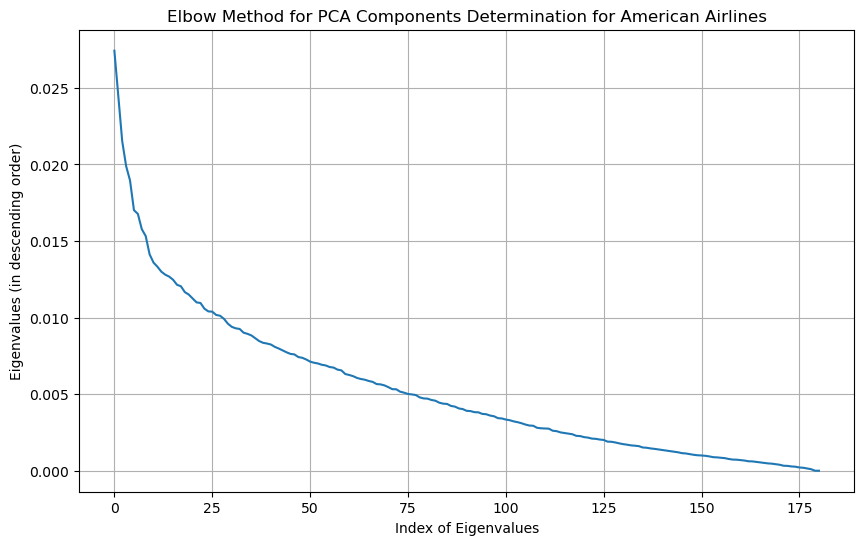

In [45]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_virg_neg = tfidf_vectorizer.fit_transform(df_virg_neg['cleaned text'])

n_components = min(tfidf_matrix_virg_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_virg_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

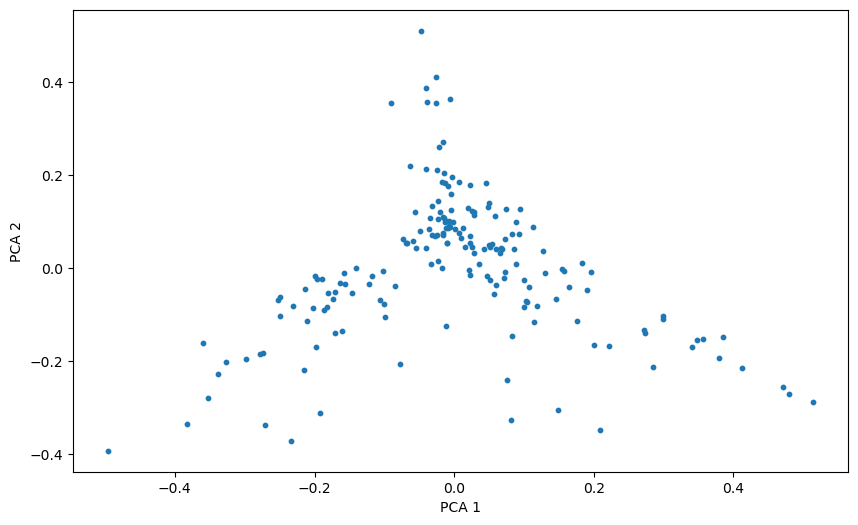

In [46]:
n_components = 25 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_virg_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [47]:
unique_negative_reasons = df_virg_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

cluster_labels = kmeans.labels_


df_virg_neg['cluster'] = cluster_labels

silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

Average Silhouette Score: 0.15410865249471112


/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/2902233520.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virg_neg['cluster'] = cluster_labels


In [48]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_virg_neg[df_virg_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_virg_neg[df_virg_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: luggage policy lax dm extra central think baggage lost response
Actual negative reasons in this cluster:
negativereason
Damaged Luggage                3
Lost Luggage                   3
Flight Attendant Complaints    1
longlines                      1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: seat want entertainment laptop 4c open paid stuck guys help
Actual negative reasons in this cluster:
negativereason
Bad Flight                 7
Customer Service Issue     4
Flight Booking Problems    1
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: flight bag plane offered carry jfk business time experience check
Actual negative reasons in this cluster:
negativereason
Bad Flight                     7
Late Flight                    6
Can't Tell                     3
Customer Servic

# Southwest

In [49]:
df_sw = df[df['airline'] == 'Southwest']
df_sw_neg = df_sw[df_sw['airline_sentiment'] == 'negative']

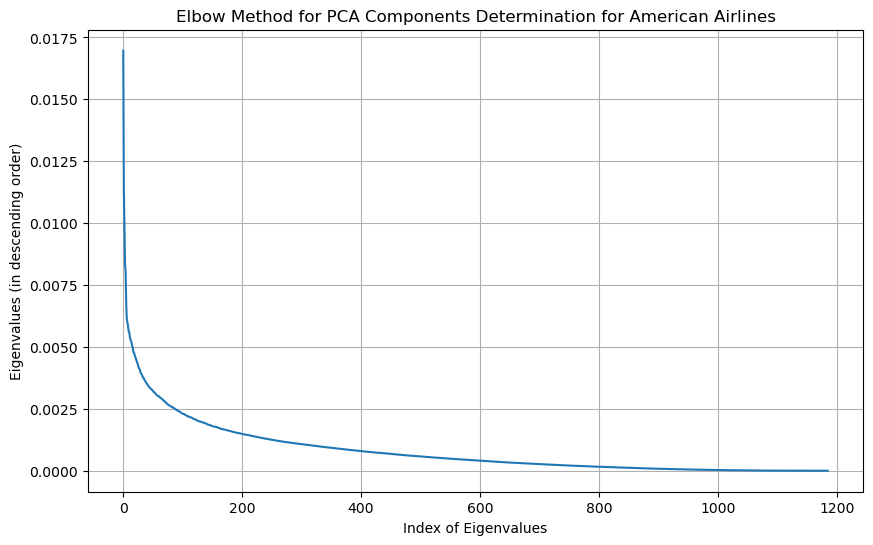

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_sw_neg = tfidf_vectorizer.fit_transform(df_sw_neg['cleaned text'])

n_components = min(tfidf_matrix_sw_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_sw_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

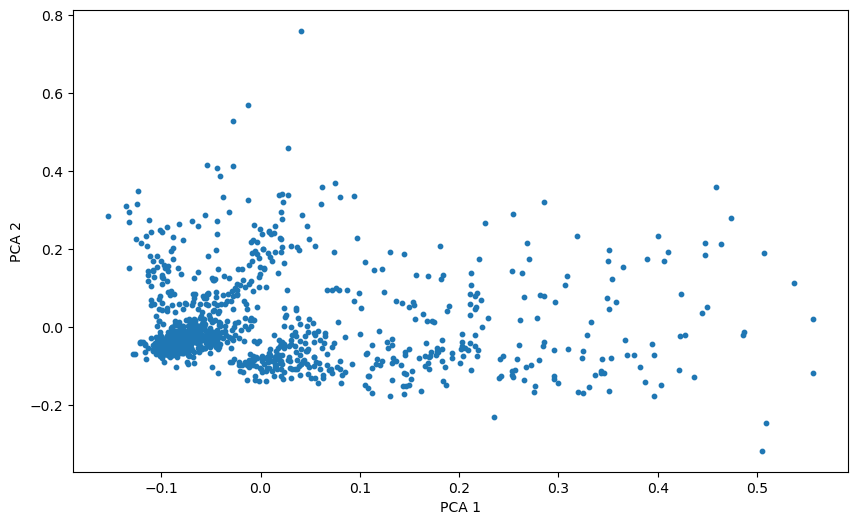

In [51]:
n_components = 90 #elbow metehod: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_sw_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [52]:
unique_negative_reasons = df_sw_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

# Cluster labels for each point
cluster_labels = kmeans.labels_


df_sw_neg['cluster'] = cluster_labels

#Analyze the Clustering Results
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

Average Silhouette Score: 0.04707675043864814


/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/694207817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sw_neg['cluster'] = cluster_labels


In [53]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_sw_neg[df_sw_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_sw_neg[df_sw_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: answer phone hold phones help need flight hour nice 30
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         16
Late Flight                     1
Cancelled Flight                1
Flight Booking Problems         1
Flight Attendant Complaints     1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: wifi dm follow slow email paid flight letting info like
Actual negative reasons in this cluster:
negativereason
Bad Flight                 28
Customer Service Issue     16
Can't Tell                  8
Cancelled Flight            1
Flight Booking Problems     1
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: bag http bags help plane hours time like fly know
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         150
Can't T

# US Airways

In [54]:
df_us = df[df['airline'] == 'US Airways']
df_us_neg = df_us[df_us['airline_sentiment'] == 'negative']

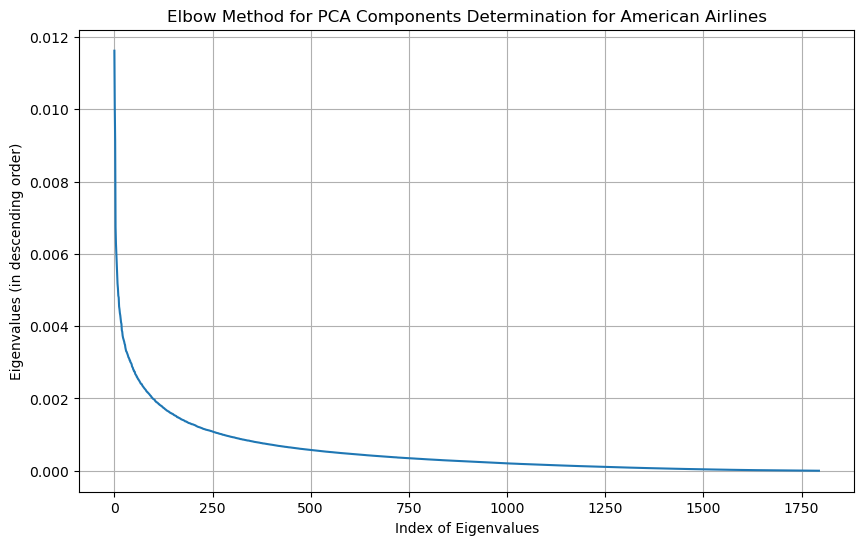

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_us_neg = tfidf_vectorizer.fit_transform(df_us_neg['cleaned text'])

n_components = min(tfidf_matrix_us_neg.shape)
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_us_neg.toarray())  

plt.figure(figsize=(10, 6))
eigenvalues = pca.explained_variance_
plt.plot(sorted(eigenvalues, reverse=True))
plt.xlabel('Index of Eigenvalues')
plt.ylabel('Eigenvalues (in descending order)')
plt.title('Elbow Method for PCA Components Determination for American Airlines')
plt.grid(True)
plt.show()

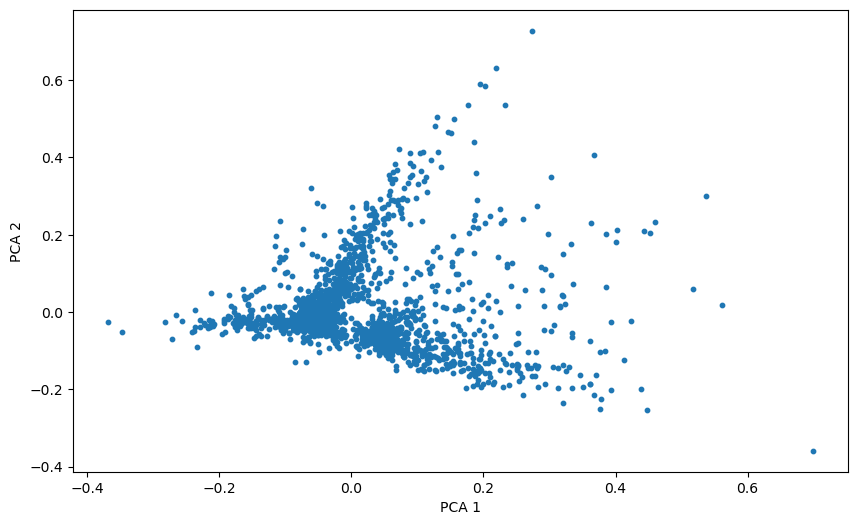

In [56]:
n_components = 125 #elbow method: number of components
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(tfidf_matrix_us_neg.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [57]:
unique_negative_reasons = df_us_neg['negativereason'].nunique()
unique_negative_reasons

kmeans = KMeans(n_clusters=unique_negative_reasons, random_state=80)
kmeans.fit(pca_transformed_data)

# Cluster labels for each point
cluster_labels = kmeans.labels_


df_us_neg['cluster'] = cluster_labels

#Analyze the Clustering Results
silhouette_avg = silhouette_score(pca_transformed_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

/Users/athirarajiv/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Silhouette Score: 0.04995020753418331


/var/folders/lw/rsdt71sj64ncqqqj9s5sbk6r0000gn/T/ipykernel_5205/3180145242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_neg['cluster'] = cluster_labels


In [58]:
n_topics_per_cluster = 1  # Assuming one main topic per cluster
lda_models = {}
for i in range(unique_negative_reasons):
    cluster_texts = tfidf_matrix_us_neg[df_us_neg['cluster'] == i]
    lda = LatentDirichletAllocation(n_components=n_topics_per_cluster, random_state=0)
    lda.fit(cluster_texts)
    lda_models[i] = lda
    print(f"Cluster {i} (corresponding to negative reasons):")
    tf_feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([tf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print("Actual negative reasons in this cluster:")
    print(df_us_neg[df_us_neg['cluster'] == i]['negativereason'].value_counts())
    print("\n" + "-" * 40 + "\n")

Cluster 0 (corresponding to negative reasons):
Topic #0: service customer worst sucks hold flights phone poor flight terrible
Actual negative reasons in this cluster:
negativereason
Customer Service Issue         119
Flight Attendant Complaints      6
longlines                        5
Can't Tell                       5
Lost Luggage                     4
Bad Flight                       1
Cancelled Flight                 1
Name: count, dtype: int64

----------------------------------------

Cluster 1 (corresponding to negative reasons):
Topic #0: hold minutes hour 45 counting change 30 hrs http time
Actual negative reasons in this cluster:
negativereason
Customer Service Issue     113
Late Flight                 10
Flight Booking Problems      4
longlines                    3
Lost Luggage                 2
Name: count, dtype: int64

----------------------------------------

Cluster 2 (corresponding to negative reasons):
Topic #0: flight plane gate delayed time hour sitting http waiting

# Discussion


### Interpreting the result

Our analysis suggests a correlation between manually labeled negative reasons and the issues identified within clusters formed by our unsupervised approach. This shows that we could potentially use the customer feedback data to automate the categorization of airline issues and identify areas for improvement. The topics extracted through Latent Dirichlet Allocation (LDA) within each cluster align somewhat with the most common negative reasons filled into the dataset manually, supporting the idea that our clustering captures meaningful patterns in the data. Despite the silhouette score for K-means clustering not being high, suggesting some overlap between clusters, the observed correlation between our clusters and manually labeled issues suggests that with more data, the clusters could become more distinct and informative. Additionally, high variability in the types of negative reasons across clusters highlights that different clusters capture different aspects of customer dissatisfaction which is not the case as we see here. We also can know that overlapping issues across clusters could imply potential ambiguity among certain negative reasons but since it rarely occurs in our analysis, it can be ignored for now.  

### Limitations

One primary limitation of our data analysis was the low silhouette scores obtained for K-means clustering. Attempting alternative clustering algorithms such as GMM and DBSCAN only yielded even lower silhouette scores, indicating poor cluster quality and significant overlap between data points within clusters. We also tried alternative methods of dimensionality reduction, including PCA and tSNE, to explore different representations of the tweet data and potentially improve clustering performance, but these methods did not significantly improve the silhouette scores or cluster quality. This limitation suggests challenges in effectively partitioning the data into distinct and homogeneous groups, potentially undermining the reliability and interpretability of our clustering results. Another limitation of our work is the potential need for more data to improve the effectiveness of our clustering approach. As we acquire more data, we hope that our model will form more distinct clusters, increasing the reliability and accuracy of our results over time. Furthermore, our analysis focuses solely on tweets and may not capture the entirety of customer sentiment -- this may not fully represent the diverse range of customer feedback channels airlines receive. Other sources, such as customer surveys or reviews on different platforms, could provide additional insights or perspectives that are not captured in tweets alone.

### Ethics & Privacy

An ethical concern in our project revolves around ensuring the privacy of individuals whose tweets are used for analysis. Despite anonymizing the data, there is still a risk of inadvertently identifying individuals through their tweets, especially if they contain unique personal information. To address this concern, we adhere to strict data anonymization practices and ensure compliance with data privacy regulations. Additionally, ongoing monitoring and evaluation of the automated categorization system can help identify and mitigate any potential biases or ethical issues that may arise. We also removed the tweet id's from the dataset that could lead to identifyign the people who made the tweet, increasing the privay.

### Conclusion

In conclusion, our study leverages natural language processing and machine learning to analyze tweets about US airlines, successfully categorizing customer feedback into clusters that highlight areas needing improvement. We trained a sentiment analysis model that could detect the sentiment of new tweets added to the model. Despite low silhouette scores on our clustering algorithms, indicating mixed sentiments, a comparative analysis suggests a correlation between clusters and specific service issues. This approach underscores the potential of using social media feedback for strategic insights, promising more targeted and effective improvements in airline service quality as data volume and analysis techniques evolve. We tried our best to take a project that can be genuinely simulated in the real world. In a world where customer feedback is extremely important, appropriately categorizing sentiment is not just helpful for airlines but across many industries as well. 


# Footnotes
<a name="note1"></a>1.[^](#note1):  Gohil, S., Vuik, S., & Darzi, A. (2018). Sentiment Analysis of Health Care Tweets: Review of the Methods Used. JMIR Public Health. https://pubmed.ncbi.nlm.nih.gov/29685871/

<a name="note2"></a>2.[^](#note2):  Hasan, M. R., Maliha, M., & Arifuzzaman, M. (2019). Sentiment Analysis with NLP on Twitter Data. 2019 International Conference on Computer, Communication, Chemical, Materials and Electronic Engineering. https://ieeexplore.ieee.org/abstract/document/9036670

<a name="note3"></a>3.[^](#note3):  Ahuja, S., & Dubey, G. (2017). Clustering and sentiment analysis on Twitter data. 2017 2nd International Conference on Telecommunication and Networks (TEL-NET). https://ieeexplore.ieee.org/abstract/document/8343568

<a name="note4"></a>4.[^](#note4): Barreto, S. et al. (2023). Sentiment analysis in tweets: an assessment study from classical to modern word representation models. Data Mining and Knowledge Discovery, 37, 318–380. https://link.springer.com/article/10.1007/s10618-022-00853-0<br>